# Building a model for "Banglore house price prediction"

<li>Importing of packages--

In [1]:
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score,mean_squared_error

<li>Read the data file--

In [2]:
def read_data():
    data=pd.read_csv(r"D:\Master in Data Science\Python\Projects\KNN_Project_5&6\KNN Assignment/bangalore house price prediction OHE-data.csv")
    return data

# Calling the read_data function--

In [3]:
data= read_data()
print(data.head(2))

   bath  balcony  price  total_sqft_int  bhk  price_per_sqft  \
0   3.0      2.0  150.0          1672.0    3     8971.291866   
1   3.0      3.0  149.0          1750.0    3     8514.285714   

   area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
0                              1                        0   
1                              0                        1   

   area_typePlot  Area  availability_Ready To Move  ...  \
0                    0                           1  ...   
1                    0                           1  ...   

   location_Kalena Agrahara  location_Horamavu Agara  location_Vidyaranyapura  \
0                         0                        0                        0   
1                         0                        0                        0   

   location_BTM 2nd Stage  location_Hebbal Kempapura  location_Hosur Road  \
0                       0                          0                    0   
1                       0                      

In [4]:
data.shape

(7120, 108)

# Print basic info about data-

In [5]:
print(data.columns)
print("-------------------------------------------")
print(data.dtypes)
print("-------------------------------------------")
print(data.info())

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)
-------------------------------------------
bath                           float64
balcony                        float64
price                          float64
total_sqft_int                 float64
bhk                              int64
                                ...   
location_Hosur Road              int64
location_Horamavu Banaswadi      int64
location_Domlur                  int64
location_Mahadevpura             int64
location_Tumkur Road  

In [6]:
data["balcony"].unique()

array([2.        , 3.        , 1.        , 0.        , 1.58437574])

<li>We can see that there are houses with 1.58437574 balconies which appears unusual.

In [7]:
#data[data["balcony"].between(1.1,1.7)]
data[(data["balcony"]>1.1) & (data["balcony"]<1.7)]

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
48,2.0,1.584376,86.00,1200.0,2,7166.666667,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
87,9.0,1.584376,500.00,4500.0,9,11111.111111,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
93,4.0,1.584376,333.00,3900.0,4,8538.461538,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
108,5.0,1.584376,110.00,2500.0,5,4400.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
127,4.0,1.584376,250.00,3245.0,4,7704.160247,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7074,2.0,1.584376,46.17,1200.0,2,3847.500000,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7077,9.0,1.584376,1900.00,12000.0,8,15833.333333,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7080,5.0,1.584376,1950.00,10000.0,5,19500.000000,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7093,5.0,1.584376,220.00,3600.0,4,6111.111111,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
(202/7120)*100

2.837078651685393

<li>we can see there are around 202 records with 1.584376 no of balconies.This 202 records occupy around 2.8 percent of our data.
We have total 7120 records,so lets drop this rows with errors.

In [9]:
df=data[(data["balcony"]==0)|(data["balcony"]==1) |(data["balcony"]==2)|(data["balcony"]==3)]
df.head(2)

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df["balcony"].unique()

array([2., 3., 1., 0.])

In [11]:
print("Total no of houses are --",len(df))
print("Houses with Super built-up Area--",len(df[df['area_typeSuper built-up  Area']==1]))
print("Houses with Built-up Area--",len(df[df['area_typeBuilt-up  Area']==1]))
print("Houses with Plot Area--",len(df[df['area_typePlot  Area']==1]))
print("-----------------")
print("Upto {} BHK houses are available.".format(df['bhk'].max()))
print("No of Ready to Move Houses are--",len(df[df['availability_Ready To Move']==1]))
print("-----------------")
print("Average price per sqft--",df["price_per_sqft"].mean())

Total no of houses are -- 6918
Houses with Super built-up Area-- 5212
Houses with Built-up Area-- 1257
Houses with Plot Area-- 417
-----------------
Upto 9 BHK houses are available.
No of Ready to Move Houses are-- 5465
-----------------
Average price per sqft-- 5868.9193989550895


# Checking for missing values--

In [12]:
df.isnull().sum()

bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64

In [13]:
df.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

In [14]:
# Renaming columns--
df1=df.rename({'area_typeSuper built-up  Area':"super_builtup_area",'area_typeBuilt-up  Area':"builtup_area",'area_typePlot  Area':"plot_area",'availability_Ready To Move':"available"},axis=1)
df1.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,super_builtup_area,builtup_area,plot_area,available,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df1.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'super_builtup_area', 'builtup_area', 'plot_area', 'available',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

# Exploratory Data Analysis --

# Checking for outliers--

<AxesSubplot:>

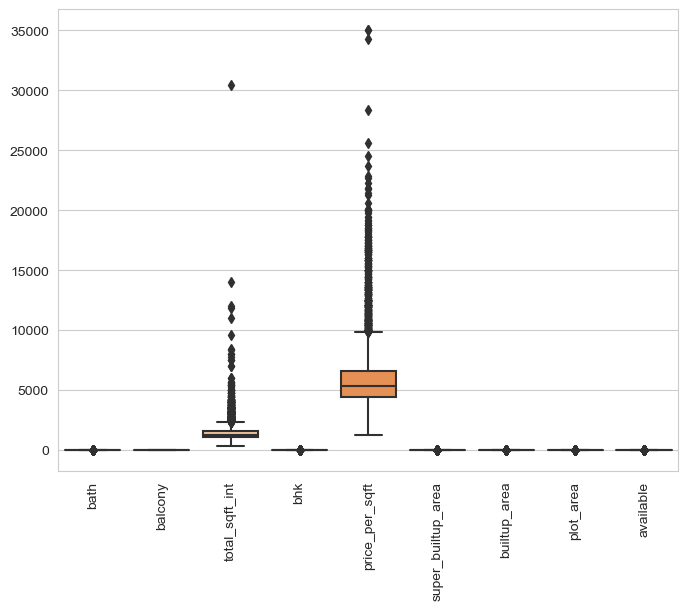

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
plt.xticks(rotation=90,fontsize="medium")
sns.boxplot(data=df1.loc[:, ['bath', 'balcony', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'super_builtup_area', 'builtup_area', 'plot_area', 'available']],palette="Oranges")

<li>Total sqft int area and price per sqft varies for different houses hence, this two columns are showing outliers.

Text(0.5, 1.0, 'Size of BHKs V/S Price per sqft area')

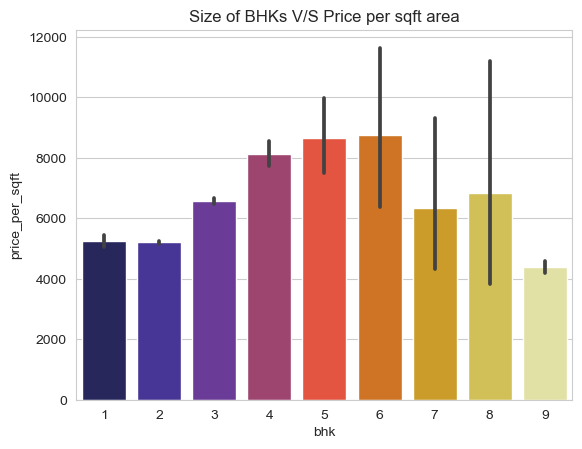

In [17]:
sns.barplot(x="bhk",y="price_per_sqft",data=df1,palette='CMRmap')
plt.title("Size of BHKs V/S Price per sqft area")

<li>We can see that Price per sqft area is high for 5 and 6 BHK houses.

Text(0.5, 1.0, 'Count of BHKs')

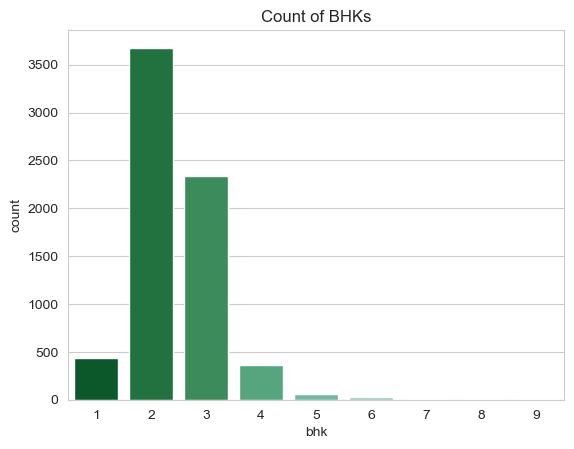

In [18]:
sns.countplot(x="bhk",data=df1,palette='BuGn_r')
plt.title("Count of BHKs")

<li>Meanwhile,there are more 2 BHK houses in Banglore followed by 3 BHKs. Lets find out about their price per sqft area --

Text(0.5, 1.0, 'Size of BHKs V/S Price per sqft area')

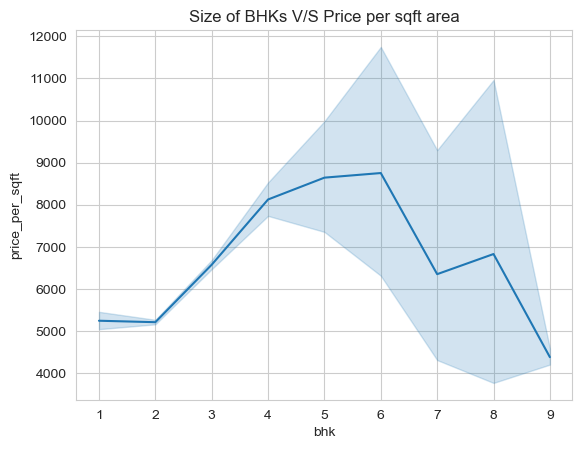

In [19]:
sns.lineplot(x="bhk",y=df1["price_per_sqft"],data=df1)
plt.title("Size of BHKs V/S Price per sqft area")

Price per sqft area is sharply rising with BHKs however, as we are approaching towards 9 BHKs, there is a downfall in prices.

Text(0.5, 1.0, 'Comparing Price per sqft area of 2 BHK V/S 3 BHK')

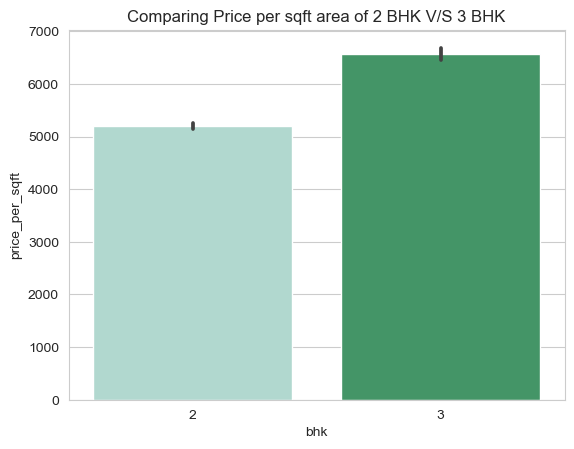

In [21]:
dfn=df1[(df1["bhk"]==2)|(data["bhk"]==3)]
sns.barplot(x="bhk",y="price_per_sqft",data=dfn,palette='BuGn')
plt.title("Comparing Price per sqft area of 2 BHK V/S 3 BHK")

<li>Priorly, we have seen that there are more no of 2 BHKs,in addition, we can say that price per sqft area is also less for 2 BHKs than 3 BHKs.

Text(0.5, 1.0, 'No of Balconies V/S Price per sqft area')

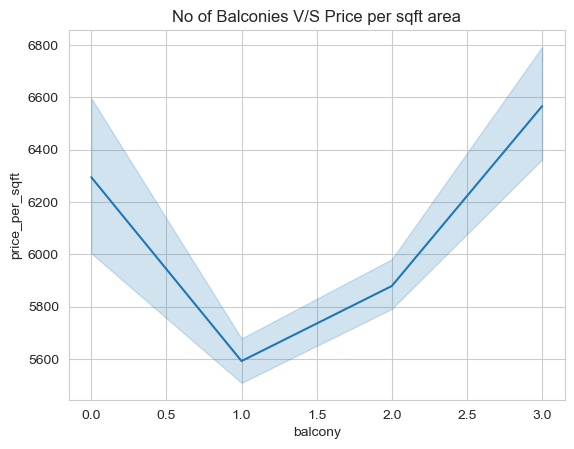

In [22]:
sns.lineplot(x='balcony',y='price_per_sqft',data=df1,palette='PuBuGn')
plt.title("No of Balconies V/S Price per sqft area")

<li>From the above graph, we can conclude that as no of balconies expands from 1 to 2 and from 2 to 3 there is increase in price per sqft area.

In [23]:
df1[['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
     'super_builtup_area','builtup_area', 'plot_area', 'available']].corr()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,super_builtup_area,builtup_area,plot_area,available
bath,1.000000,0.300074,0.510338,0.676229,0.875053,0.335517,-0.111749,0.031170,0.152927,0.016270
balcony,0.300074,1.000000,0.154844,0.233158,0.284045,0.070028,0.122504,-0.049171,-0.142729,0.118364
price,0.510338,0.154844,1.000000,0.777053,0.488212,0.734374,-0.109201,-0.012394,0.221210,0.012499
total_sqft_int,0.676229,0.233158,0.777053,1.000000,0.674932,0.385540,-0.128785,0.016462,0.210531,0.014851
bhk,0.875053,0.284045,0.488212,0.674932,1.000000,0.312623,-0.134302,0.043292,0.170791,0.038208
price_per_sqft,0.335517,0.070028,0.734374,0.385540,0.312623,1.000000,-0.102511,-0.025839,0.229835,0.036447
super_builtup_area,-0.111749,0.122504,-0.109201,-0.128785,-0.134302,-0.102511,1.000000,-0.823633,-0.442681,-0.118815
builtup_area,0.031170,-0.049171,-0.012394,0.016462,0.043292,-0.025839,-0.823633,1.000000,-0.119344,0.115049
plot_area,0.152927,-0.142729,0.221210,0.210531,0.170791,0.229835,-0.442681,-0.119344,1.000000,0.027709
available,0.016270,0.118364,0.012499,0.014851,0.038208,0.036447,-0.118815,0.115049,0.027709,1.000000


<AxesSubplot:>

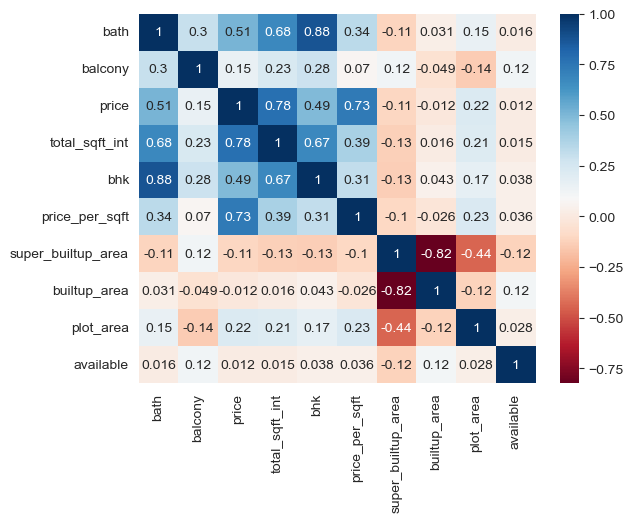

In [24]:
sns.heatmap(df1 [['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft','super_builtup_area',
                  'builtup_area', 'plot_area', 'available']].corr(),annot=True,cmap="RdBu")

<li>Model building-- Using KNN Regressor--

In [25]:
from sklearn.neighbors import KNeighborsRegressor

X=df1[['bath', 'balcony', 'total_sqft_int', 'bhk','price_per_sqft','super_builtup_area',
       'builtup_area', 'plot_area', 'available']]
y=df1['price']

def train_test(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
    print(X_train.shape),print(y_train.shape)
    print(X_test.shape),print(y_test.shape)
    return X_train,X_test,y_train,y_test

print("Calling the train_test function--")
X_train,X_test,y_train,y_test=train_test(X,y)

def modelling(X_train,y_train,X_test):
    model=KNeighborsRegressor(n_neighbors=22)
    model_train=model.fit(X_train,y_train)
    print("Model training is completed")
    pred_knn=model_train.predict(X_test)
    return pred_knn

print("Calling the modelling function--")
pred_knn=modelling(X_train,y_train,X_test)
print(pred_knn)
r2score=(round(r2_score(y_test,pred_knn)*100,2))
print("--------------------------------------------")
print("KNN Regression--")
print('r2score:',r2score)
rmse = m.sqrt(mean_squared_error(y_test,pred_knn))
print('RMSE:',rmse)

Calling the train_test function--
(5534, 9)
(5534,)
(1384, 9)
(1384,)
Calling the modelling function--
Model training is completed
[95.78045455 51.77454545 16.22045455 ... 47.10045455 65.53318182
 50.40136364]
--------------------------------------------
KNN Regression--
r2score: 78.3
RMSE: 50.582725043507025


<li>Our Model is giving us accuracy of 78.3%

In [26]:
#To choose k---sqrt(n)
from math import sqrt
import numpy as np
(len(df1))
sqrt(len(df1))

83.17451532771321

In [27]:
#error method
error_rate=[]
for i in range(1,100):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(1-r2_score(y_test,pred_i))

In [28]:
error_rate

[0.005479123010749265,
 0.05409306930762148,
 0.1067413288955954,
 0.0890612227187032,
 0.10031576962157795,
 0.1303040097792294,
 0.1438600776347826,
 0.16353429782238904,
 0.18657543338216076,
 0.19434376831980316,
 0.186634395701626,
 0.1777894033117452,
 0.19422689185585895,
 0.1992283550514936,
 0.20833110691211176,
 0.21878816427211922,
 0.2250688388598634,
 0.2297235962894244,
 0.23263971011333218,
 0.24021784654653588,
 0.22901466214503963,
 0.21700861875215627,
 0.22352635138503718,
 0.22651389008156564,
 0.2316546947585013,
 0.23593682059451848,
 0.2416769587687746,
 0.24505876621252087,
 0.25117142877426546,
 0.2555515732083623,
 0.25743590313094167,
 0.2595068868306485,
 0.2629018462042212,
 0.265097336852991,
 0.2683672227533139,
 0.272775406440523,
 0.2755703266657169,
 0.2786348354428837,
 0.27989994241732985,
 0.2812130850851261,
 0.2845478908842909,
 0.2879122705662842,
 0.2901877681057603,
 0.2930806869668612,
 0.2960095178612595,
 0.2985395885556872,
 0.3008701958007

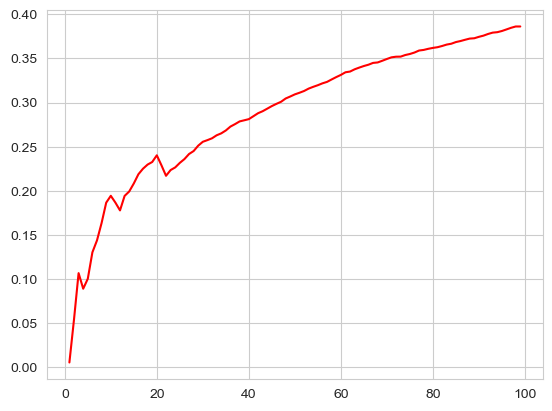

In [29]:
plt.plot(range(1,100),error_rate,color="red")